# Germany Rental Prediction - Cleaning, EDA and Prediction

## Purpose from this kernel.

I've travel from SEA and I don't know how much apartment in the Berlin should cost and it's really tough to find an apartment while I'm staying in Germany for my Master Degree. Furthermore, I need something for my Data Science Portfolio for the job application after graduation. So why not build something from the scratch with the dataset on the Kaggle

So this kernel will be well written than my previous kernel for other people and using what I've learnt in my master course and other online resources to produce something that will be practical for the real environment.

## What we expected from this kernel.
- Data cleaning to clear the outliers and remove columns that doesn't have high correlation to the prediction
- Create virtualization to have a better understanding of the data of the rental in Germany.
- Feature engineering from the original variable to create a better model
- Create a tool that estimate the house cost predicted by many variables

# Basic data handling and inspection

Import all important libraries in this kernel

In [102]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import time
import datetime
from datetime import date
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
import lightgbm as lgb

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import plotly.io as pio
pio.renderers.default = "iframe"

Load the dataset to the kernel

In [168]:
df = pd.read_csv('data/immo_data.csv')

### Simple Inspection

In [104]:
df.head(10)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.00,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.00,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.00,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.00,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.00,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.00,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.00,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.00,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,NaN,1999.0,115531145,NaN,gas,True,Schleswig_Holstein,False,5.0,315.20,1e,53.43,Schleswig_Flensburg_Kreis,well_kept,NaN,no,Hardeseiche,Hardeseiche,False,2,apartment,24891,2.0,165.0,NaN,NaN,2,False,2,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,380.00,NaN,114391930,NaN,NaN,False,Sachsen,True,NaN,310.00,14,62.00,Mittelsachsen_Kreis,fully_renovated,NaN,NaN,Am Bahnhof,Am_Bahnhof,False,2,NaN,9599,2.0,NaN,1.0,4.0,2,True,3,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,584.25,1959.0,115270775,NaN,gas:electricity,False,Bremen,True,2.0,452.25,35,60.30,Bremen,NaN,NaN,NaN,Lesumer Heerstr.,Lesumer_Heerstr.,False,3,ground_floor,28717,3.0,63.0,NaN,NaN,3,False,2,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,690.00,1970.0,106416361,1.0,oil,True,Baden_Württemberg,True,2.0,580.00,NaN,53.00,Emmen

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [106]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [107]:
print(f'Number of columns is:',df.shape[1],'and rows is:',df.shape[0])

Number of columns is: 49 and rows is: 268850


# Cleaning Job

The boring part of this kernel. It might a bit confuse but what we're trying in this section is dealing with many things such as
- Outliers
- Missing Data
- Drop columns
- Etc.
The result of this part is we will have a better dataset to analyze, virtualization and making a prediction.

## Dealing with the missing values

When we're working on any datasets, we need to check on the missing values to make sure the data is ready or not for further analyzation and virutalization.

Create the function to show the top 20 missing values by include number of missing values and percentage of it.

In [108]:
def missing_values(temp_idf,norows):   # input by the df and the number of rows that you want to show
    total = temp_idf.isnull().sum().sort_values(ascending=False)
    percent = ((temp_idf.isnull().sum().sort_values(ascending=False)/temp_idf.shape[0])*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(norows))


In [109]:
missing_values(df,20) # we use the df and the number of rows to show is 20

,Total,Percent
telekomHybridUploadSpeed,223830,83.254603
electricityKwhPrice,222004,82.575414
electricityBasePrice,222004,82.575414
energyEfficiencyClass,191063,71.066766
lastRefurbish,188139,69.979171
heatingCosts,183332,68.191185
noParkSpaces,175798,65.388879
petsAllowed,114573,42.615957
interiorQual,112665,41.906267
thermalChar,106506,39.615399


As we can see it contains a lot of missing value in some columns so I decide to remove all of the columns that contain missing value more than 20%

In [110]:
missing_data = missing_values(df,20)
# drop the data where the columns contains more than 30%
df = df.drop((missing_data[missing_data['Percent'] > 30]).index,1)

Because I want to predict rental price ('totalRent') so I should drop all the rows that doesn't consist totalRent

In [111]:
df.dropna(subset=['totalRent'],inplace=True)

### Delete columns that doesn't contain useful information

In [112]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,floor,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.00,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.00,244,86.00,Dortmund,well_kept,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,1.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.00,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.00,4,83.80,Dresden,first_time_use,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,3.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
4,Bremen,138.0,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.00,1950.0,114751222,gas,False,Bremen,False,1.0,765.00,10,84.97,Bremen,refurbished,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,1.0,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
6,Sachsen,70.0,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.4,380.00,NaN,114391930,NaN,False,Sachsen,True,NaN,310.00,14,62.00,Mittelsachsen_Kreis,fully_renovated,Am Bahnhof,Am_Bahnhof,False,2,NaN,9599,2.0,1.0,2,True,3,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,Feb20
7,Bremen,88.0,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.4,584.25,1959.0,115270775,gas:electricity,False,Bremen,True,2.0,452.25,35,60.30,Bremen,NaN,Lesumer Heerstr.,Lesumer_Heerstr.,False,3,ground_floor,28717,3.0,NaN,3,False,2,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,Feb20


### Drop and delete what we wouldn't use

In [113]:
df.drop(columns=['livingSpaceRange','street','description','facilities','geo_krs','geo_plz','scoutId','regio1','telekomUploadSpeed','telekomTvOffer','pricetrend','regio3','noRoomsRange','picturecount','geo_bln','date',\
    'houseNumber','streetPlain','firingTypes','yearConstructedRange'],inplace=True)

Let's check the missing data in this dataframe again before making any other decision.

In [114]:
missing_values(df,10)

,Total,Percent
condition,56980,24.954781
yearConstructed,49285,21.584703
floor,40370,17.680318
heatingType,36823,16.126885
typeOfFlat,30556,13.382209
serviceCharge,4090,1.791243
garden,0,0.000000
noRooms,0,0.000000
baseRentRange,0,0.000000
lift,0,0.000000


### Other condition
Take a deeper analysis in the condition variable and I fill all of the missing value into 'Other'

In [115]:
df['condition'].fillna("Other", inplace=True) # fill the NA by Other
df['condition'].value_counts()

Other                                 56980
well_kept                             55573
refurbished                           24556
fully_renovated                       22529
mint_condition                        18984
first_time_use                        18150
modernized                            14834
first_time_use_after_refurbishment    13751
negotiable                             1833
need_of_renovation                     1139
ripe_for_demolition                       4
Name: condition, dtype: int64

The last 3 is not the good condition for the apartnebt fubder so I will group it in 'Other'

In [116]:
otherscondition = df['condition'].value_counts().tail(3).index

othersregion = list(df['condition'].value_counts().tail(3).index)
def editcondition(dflist):
    if dflist in otherscondition:
        return 'Other'
    else:
        return dflist

df['condition'] =df['condition'].apply(editcondition)
df['condition'].value_counts()

Other                                 59956
well_kept                             55573
refurbished                           24556
fully_renovated                       22529
mint_condition                        18984
first_time_use                        18150
modernized                            14834
first_time_use_after_refurbishment    13751
Name: condition, dtype: int64

Fill NA of 'yearConstructed' with the mean of each type of condition 'condition' because from my perspective if the apartment is not fully_renovated or refurbished it means that it should have a lot of usage year.

In [117]:
df["yearConstructed"] = df['yearConstructed'].fillna(df.groupby('condition')['yearConstructed'].transform('mean')).round(0)

Create the new variables to tell the duration since last renovated or built til the today

In [118]:
df['numberOfYear'] = date.today().year - df["yearConstructed"]


### Other region
In other region, It might not have sufficient data so I group them together and put it in Other variable.

In [119]:
othersregion = list(df['regio2'].value_counts().iloc[20:,].index)
def edit_region(dflist):
    if dflist in othersregion:
        return 'Other'
    else:
        return dflist

df['regio2'] =df['regio2'].apply(edit_region)
df['regio2'].value_counts()

Other                   140421
Leipzig                  12580
Chemnitz                 11388
Berlin                    9744
Dresden                   6368
Magdeburg                 4553
Halle_Saale               3967
München                   3943
Frankfurt_am_Main         3726
Essen                     3610
Hamburg                   3395
Düsseldorf                3195
Duisburg                  2871
Dortmund                  2573
Mittelsachsen_Kreis       2521
Gelsenkirchen             2485
Köln                      2277
Recklinghausen_Kreis      2276
Zwickau                   2215
Zwickau_Kreis             2175
Leipzig_Kreis             2050
Name: regio2, dtype: int64

### Selecting only highest 20 city by quantity of data
I choose only 20 because below that it contains less data to predict anything so I should choose only the top 20 of the number of data

In [120]:
regionlist = list(df['regio2'].value_counts().head(25).index)
regionlist # top 20 city that contains the most data counts

['Other',
 'Leipzig',
 'Chemnitz',
 'Berlin',
 'Dresden',
 'Magdeburg',
 'Halle_Saale',
 'München',
 'Frankfurt_am_Main',
 'Essen',
 'Hamburg',
 'Düsseldorf',
 'Duisburg',
 'Dortmund',
 'Mittelsachsen_Kreis',
 'Gelsenkirchen',
 'Köln',
 'Recklinghausen_Kreis',
 'Zwickau',
 'Zwickau_Kreis',
 'Leipzig_Kreis']

In [121]:
df = df[pd.DataFrame(df['regio2'].tolist()).isin(regionlist).any(1).values]
df['regio2'].value_counts()

Other                   140421
Leipzig                  12580
Chemnitz                 11388
Berlin                    9744
Dresden                   6368
Magdeburg                 4553
Halle_Saale               3967
München                   3943
Frankfurt_am_Main         3726
Essen                     3610
Hamburg                   3395
Düsseldorf                3195
Duisburg                  2871
Dortmund                  2573
Mittelsachsen_Kreis       2521
Gelsenkirchen             2485
Köln                      2277
Recklinghausen_Kreis      2276
Zwickau                   2215
Zwickau_Kreis             2175
Leipzig_Kreis             2050
Name: regio2, dtype: int64

## Outliers

What we should focus in the first is the data that we want to predict and what relavance most which is 'KaltMiete' and 'WarmMiete'

In [122]:
df['baseRent'].describe().round(2)

count     228333.00
mean         653.83
std         3361.44
min            0.00
25%          335.00
50%          490.00
75%          795.00
max      1234567.00
Name: baseRent, dtype: float64

In [123]:
df['totalRent'].describe().round(2)

count      228333.00
mean          901.33
std         33238.33
min             0.00
25%           469.80
50%           650.00
75%           985.00
max      15751535.00
Name: totalRent, dtype: float64

Code below I filter and plot the graph repeatly to see the best result and try to remove the outliers that doesn't make sense to the df

In [124]:
df = df[(df['baseRent'] > 200) & (df['baseRent'] < 8000)]
df = df[(df['totalRent'] > 200) & (df['totalRent'] < 9000)]
df = df[(df['totalRent'] > df['baseRent'])]
df = df[(df['totalRent'] - df['baseRent']) < 500]


In [125]:
fig = px.scatter(df, x='totalRent', y='baseRent')
fig.show()

In [126]:
df['livingSpace'].describe()

count    214026.000000
mean         73.531597
std         148.420916
min           0.000000
25%          55.000000
50%          67.660000
75%          86.000000
max       66100.000000
Name: livingSpace, dtype: float64

In [127]:
df = df[(df['livingSpace'] > 10) & (df['livingSpace'] < 400)]


In [128]:
fig = px.scatter(df, x='baseRent', y='livingSpace')
fig.show()

### Feature Engineering
We've already created some columns already such as 'numberOfYears'. However, now I'm trying to create more variables for inspect and building a model from new variables later.

Create a new columns for the price per square meter

In [129]:
df['Pricepm2'] = df['baseRent'] / df['livingSpace']
df['additioncost'] = df['totalRent'] - df['baseRent']

In [130]:
fig = px.scatter(df, x='totalRent', y='Pricepm2')
fig.show()

### Service Charge

In [131]:
df['serviceCharge'].describe()

count    211440.000000
mean        152.326753
std         331.318808
min           0.000000
25%         100.000000
50%         140.000000
75%         190.000000
max      146118.000000
Name: serviceCharge, dtype: float64

In [132]:
df = df[(df['serviceCharge'] < 1000)]


In [133]:
fig = px.scatter(df, x='totalRent', y='serviceCharge')
fig.show()

## Fill all the missing values

In [134]:
df = df[(df['floor'] >= -1) & (df['floor'] <= 20)] # Floor should contain only basement - 20th floor
df['heatingType'].fillna(df['heatingType'].mode()[0], inplace=True)
df['typeOfFlat'].fillna(df['typeOfFlat'].mode()[0], inplace=True)

In [135]:
heatinglist = list(df['heatingType'].value_counts().head(10).index)
df = df[pd.DataFrame(df['heatingType'].tolist()).isin(heatinglist).any(1).values]

In [136]:
df.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,floor,garden,regio2,numberOfYear,Pricepm2,additioncost
0,245.0,central_heating,False,False,840.0,1965.0,False,True,595.0,86.00,well_kept,False,4,ground_floor,4.0,1.0,True,Dortmund,57.0,6.918605,245.0
2,255.0,floor_heating,True,True,1300.0,2019.0,False,True,965.0,83.80,first_time_use,True,6,apartment,3.0,3.0,False,Dresden,3.0,11.515513,335.0
4,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,False,765.0,84.97,refurbished,False,5,apartment,3.0,1.0,False,Other,72.0,9.003178,138.0
6,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,True,310.0,62.00,fully_renovated,False,2,apartment,2.0,1.0,True,Mittelsachsen_Kreis,64.0,5.000000,70.0
8,110.0,oil_heating,False,False,690.0,1970.0,True,True,580.0,53.00,well_kept,False,4,roof_storey,2.0,2.0,False,Other,52.0,10.943396,110.0


In [137]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

Drop the 'baseRent' columns because it has a lot of correlation to 'totalRent'

In [138]:
df.drop(['baseRent','baseRentRange'],axis=1,inplace=True)

Checking for the last time, we don't have any missing data left

In [139]:
missing_values(df,5)

,Total,Percent
serviceCharge,0,0.0
lift,0,0.0
Pricepm2,0,0.0
numberOfYear,0,0.0
regio2,0,0.0


Now we're finished with Data Cleaning Job so we could virtualization to have a better understanding of our dataset.

# Data Virtualization

In [140]:
df.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,livingSpace,condition,lift,typeOfFlat,noRooms,floor,garden,regio2,numberOfYear,Pricepm2,additioncost
0,245.0,central_heating,False,False,840.0,1965.0,False,True,86.00,well_kept,False,ground_floor,4.0,1.0,True,Dortmund,57.0,6.918605,245.0
2,255.0,floor_heating,True,True,1300.0,2019.0,False,True,83.80,first_time_use,True,apartment,3.0,3.0,False,Dresden,3.0,11.515513,335.0
4,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,False,84.97,refurbished,False,apartment,3.0,1.0,False,Other,72.0,9.003178,138.0
6,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,True,62.00,fully_renovated,False,apartment,2.0,1.0,True,Mittelsachsen_Kreis,64.0,5.000000,70.0
8,110.0,oil_heating,False,False,690.0,1970.0,True,True,53.00,well_kept,False,roof_storey,2.0,2.0,False,Other,52.0,10.943396,110.0


I love to use correlation map to inspect the dataset. Which  variables has the more correlation to the variables that we want to predict.

<AxesSubplot:>

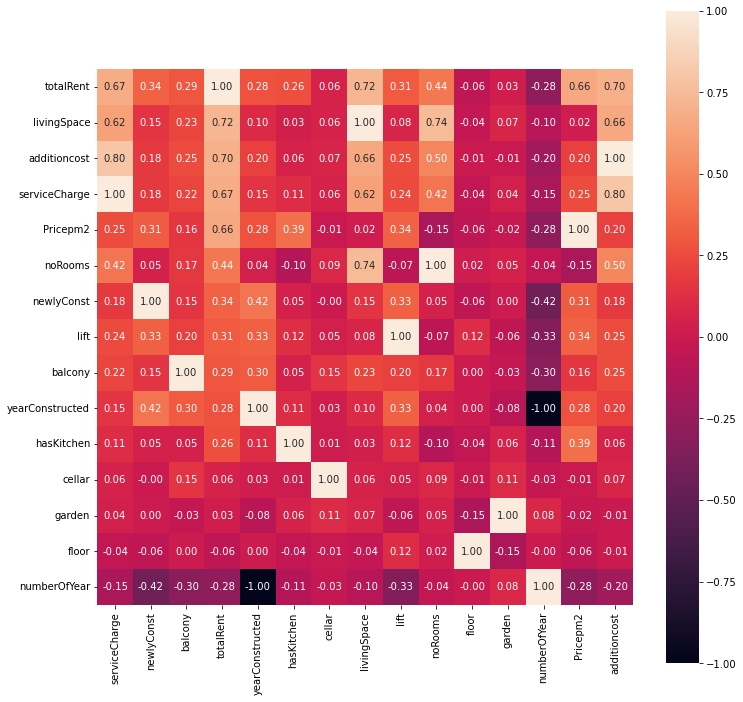

In [141]:
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True)

From the dataset, variables that irrelevant to 'totalRent' are 'cellar','floor' and 'garden' so I would consider drop it.

In [142]:
df.drop(['cellar','floor','garden'],axis=1,inplace=True)

### Basic inspection to check the kurtosis and skewness of the data

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

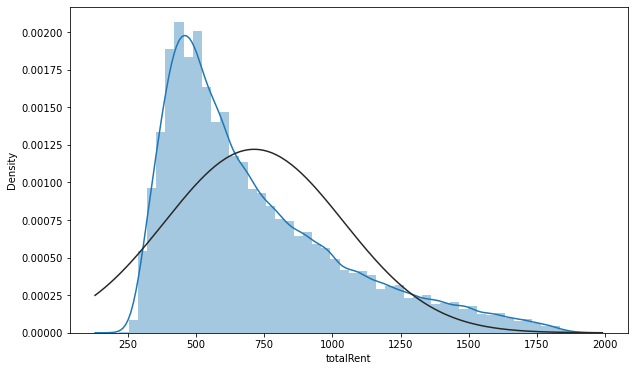

In [143]:
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(df['totalRent'],fit=norm)

<AxesSubplot:xlabel='livingSpace', ylabel='Density'>

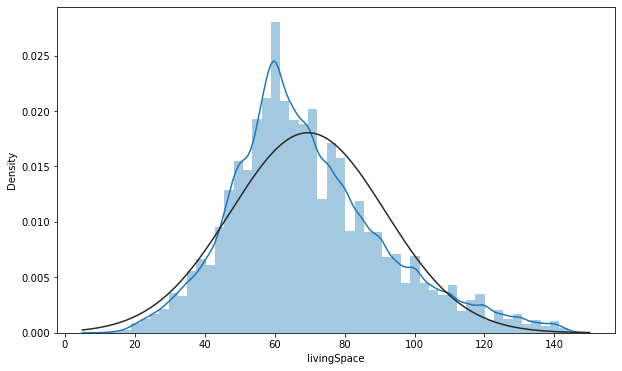

In [144]:
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(df['livingSpace'],fit=norm)

In [145]:
df.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,livingSpace,condition,lift,typeOfFlat,noRooms,regio2,numberOfYear,Pricepm2,additioncost
0,245.0,central_heating,False,False,840.0,1965.0,False,86.00,well_kept,False,ground_floor,4.0,Dortmund,57.0,6.918605,245.0
2,255.0,floor_heating,True,True,1300.0,2019.0,False,83.80,first_time_use,True,apartment,3.0,Dresden,3.0,11.515513,335.0
4,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,84.97,refurbished,False,apartment,3.0,Other,72.0,9.003178,138.0
6,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,62.00,fully_renovated,False,apartment,2.0,Mittelsachsen_Kreis,64.0,5.000000,70.0
8,110.0,oil_heating,False,False,690.0,1970.0,True,53.00,well_kept,False,roof_storey,2.0,Other,52.0,10.943396,110.0


### Start with the ratio of each city

In [146]:
countpie = df['regio2'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "City",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the City ratio in the dataset",
    }
}
iplot(fig)

In [147]:
countpie = df['regio2'].value_counts().iloc[1:,]

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "City",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the City ratio in the dataset exclude 'Other'",
    }
}
iplot(fig)

In [148]:
plotter = df.groupby('regio2')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Cost of rental')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

München, Frankfurt am Main, Hamburg, Düsseldorf, Berlin and Köln seem to be the highest rental city

In [149]:
rentmean = df.groupby(['regio2'])['totalRent'].mean().sort_index()

fig = px.histogram(x = df['regio2'].value_counts().sort_index().index,
                   y = rentmean,
                   color= df['regio2'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

In [150]:
plotter = df.groupby('regio2')['Pricepm2'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month compare by area per square meter", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Euro/square meter')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [151]:
plotter = df.groupby('condition')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['condition'] = plotter.index

data = [
    {
        'x': plotter['condition'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['condition'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month group by apartment condition", 
                   xaxis=dict(title='Apartment Condition'),
                   yaxis=dict(title='Cost of rental')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [152]:
plotter = df.groupby('regio2')['livingSpace'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average living space group by city", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Average Living Space')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [153]:
countpie = df['heatingType'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "City",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the City ratio in the dataset",
    }
}
iplot(fig)

In [154]:
plotter = df.groupby('heatingType')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['heatingType'] = plotter.index

data = [
    {
        'x': plotter['heatingType'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['heatingType'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental group by heating type", 
                   xaxis=dict(title='Heating Type'),
                   yaxis=dict(title='Average Rental Cost')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [155]:
countpie = df['newlyConst'].value_counts()
countpie = countpie.sort_index() 
fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": ['False','True'],
      "domain": {"x": [0, .5]},
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of the residence is newly constructed or not",
    }
}
iplot(fig)

Most of the apartment are newly constructed. Then, I want to know the difference of a price between refurbrished are having a big gap or not

In [156]:
constructmean = df.groupby(['newlyConst'])['totalRent'].mean().sort_index()

fig = px.histogram(x = df['newlyConst'].value_counts().sort_index().index,
                   y = constructmean,
                   color= df['newlyConst'].value_counts().sort_index().index
             )
fig.update_xaxes(title="Newly construct or not")
fig.update_yaxes(title = "Rental Cost")
fig.show()

So the difference between refurbrished or newly construct have more rental earning per month at 600 Euro.

In [157]:
plotter = df.groupby('regio2')['additioncost'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average Addition Cost Per Month (Warmmiete - Kaltmiete)", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Additional Cost per month')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [158]:
plotter = df.groupby('typeOfFlat')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['typeOfFlat'] = plotter.index

data = [
    {
        'x': plotter['typeOfFlat'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['typeOfFlat'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Type of Apartment and Average Rental Cost Per Month", 
                   xaxis=dict(title='Type Of Rental'),
                   yaxis=dict(title='Average rental type cost per month')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

We might want to seperate the type of rental kind because some of it cost very high per month.

In [159]:
countpie = df['hasKitchen'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "City",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of the Apartment has kitchen or not",
    }
}
iplot(fig)

Most of the place is not inclde kitchen

In [160]:
constructmean = df.groupby(['hasKitchen'])['totalRent'].mean().sort_index()

fig = px.histogram(x = df['hasKitchen'].value_counts().sort_index().index,
                   y = constructmean,
                   color= df['hasKitchen'].value_counts().sort_index().index
             )
             
fig.update_xaxes(title="Has Kitchen")
fig.update_yaxes(title = "Cost of Rental")
fig.show()

Further opinion, we could create more meaningful virtualization such as seperate rental types or others to make it clearer for the trend of rental cost in Germany

In [161]:
df.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,livingSpace,condition,lift,typeOfFlat,noRooms,regio2,numberOfYear,Pricepm2,additioncost
0,245.0,central_heating,False,False,840.0,1965.0,False,86.00,well_kept,False,ground_floor,4.0,Dortmund,57.0,6.918605,245.0
2,255.0,floor_heating,True,True,1300.0,2019.0,False,83.80,first_time_use,True,apartment,3.0,Dresden,3.0,11.515513,335.0
4,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,84.97,refurbished,False,apartment,3.0,Other,72.0,9.003178,138.0
6,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,62.00,fully_renovated,False,apartment,2.0,Mittelsachsen_Kreis,64.0,5.000000,70.0
8,110.0,oil_heating,False,False,690.0,1970.0,True,53.00,well_kept,False,roof_storey,2.0,Other,52.0,10.943396,110.0


# Machine Learning

## Preparing the data for train
Copying the data

In [162]:
predict_df = df.copy()
predict_df.drop(columns=['yearConstructed','serviceCharge','numberOfYear','newlyConst','lift','balcony','hasKitchen','Pricepm2'],inplace=True)
predict_df.head()

,heatingType,totalRent,livingSpace,condition,typeOfFlat,noRooms,regio2,additioncost
0,central_heating,840.0,86.00,well_kept,ground_floor,4.0,Dortmund,245.0
2,floor_heating,1300.0,83.80,first_time_use,apartment,3.0,Dresden,335.0
4,self_contained_central_heating,903.0,84.97,refurbished,apartment,3.0,Other,138.0
6,self_contained_central_heating,380.0,62.00,fully_renovated,apartment,2.0,Mittelsachsen_Kreis,70.0
8,oil_heating,690.0,53.00,well_kept,roof_storey,2.0,Other,110.0


Export the data to use in PyCaret in Google Colab

In [165]:
df.to_csv('data/test.csv')
predict_df.to_csv('data/predict_test.csv')

If it's an object or bool type (True,False). Code below will create the dummies for all of the categorical.

In [61]:
columns = []
for cols in predict_df.columns:
    if predict_df[cols].dtype == 'object' or predict_df[cols].dtype == 'bool':
        columns.append(cols)
dummies_feature = pd.get_dummies(predict_df[columns],prefix='',prefix_sep='')
dummies_feature.head()

,central_heating,combined_heat_and_power_plant,district_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,oil_heating,self_contained_central_heating,wood_pellet_heating,Other,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,refurbished,well_kept,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat,Berlin,Chemnitz,Dortmund,Dresden,Duisburg,Düsseldorf,Essen,Frankfurt_am_Main,Gelsenkirchen,Halle_Saale,Hamburg,Köln,Leipzig,Leipzig_Kreis,Magdeburg,Mittelsachsen_Kreis,München,Other,Recklinghausen_Kreis,Zwickau,Zwickau_Kreis
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Combine those columns together and drop the categorical columns that we created the dummies

In [62]:
predict_df = predict_df.drop(columns=columns)
predict_df = pd.concat([predict_df, dummies_feature], axis=1)
predict_df.head()

,totalRent,livingSpace,noRooms,additioncost,central_heating,combined_heat_and_power_plant,district_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,oil_heating,self_contained_central_heating,wood_pellet_heating,Other,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,refurbished,well_kept,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat,Berlin,Chemnitz,Dortmund,Dresden,Duisburg,Düsseldorf,Essen,Frankfurt_am_Main,Gelsenkirchen,Halle_Saale,Hamburg,Köln,Leipzig,Leipzig_Kreis,Magdeburg,Mittelsachsen_Kreis,München,Other,Recklinghausen_Kreis,Zwickau,Zwickau_Kreis
0,840.0,86.00,4.0,245.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1300.0,83.80,3.0,335.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,903.0,84.97,3.0,138.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,380.0,62.00,2.0,70.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,690.0,53.00,2.0,110.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
predict_df = predict_df*1

I want to normalization the columns that's int or float type

In [64]:
# for cols in predict_df.columns:
#     if predict_df[cols].dtype == 'int64' or predict_df[cols].dtype == 'float64':
#         if cols != 'totalRent':
#             predict_df[cols] = ((predict_df[cols] - predict_df[cols].mean())/(predict_df[cols].std()))

# predict_df            

Move the 'totalRent' column to the first column to make it easier for split the data.

In [68]:
move = predict_df['totalRent']
predict_df.drop(labels=['totalRent'], axis=1,inplace = True)
predict_df.insert(0, 'totalRent', move)
predict_df.head()

,totalRent,livingSpace,noRooms,additioncost,central_heating,combined_heat_and_power_plant,district_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,oil_heating,self_contained_central_heating,wood_pellet_heating,Other,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,refurbished,well_kept,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat,Berlin,Chemnitz,Dortmund,Dresden,Duisburg,Düsseldorf,Essen,Frankfurt_am_Main,Gelsenkirchen,Halle_Saale,Hamburg,Köln,Leipzig,Leipzig_Kreis,Magdeburg,Mittelsachsen_Kreis,München,Other,Recklinghausen_Kreis,Zwickau,Zwickau_Kreis
0,840.0,86.00,4.0,245.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1300.0,83.80,3.0,335.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,903.0,84.97,3.0,138.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,380.0,62.00,2.0,70.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,690.0,53.00,2.0,110.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Spliting the data into train and test

In [69]:
X = predict_df.iloc[:,1:] # Select all the columns, that's not totalRent
y = predict_df.iloc[:,0] # Select only totalRent
X_val = X.values
y_val = y.values
x_train, x_test, y_train, y_test = train_test_split(X_val, y_val, test_size = 0.25, random_state = 123)

## Light Gradient Boost
I've found this model is like Xgboost and it's run much faster, so now I'm trying as much as I could to use this libraries to improve my skills

In [72]:
d_train = lgb.Dataset(x_train, label=y_train) # Load the dataset and test

# parameters for this model
params = {
        'n_estimators': 10000,
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'max_depth': -1,
        'learning_rate': 0.01,
        'subsample': 0.72,
        'subsample_freq': 4,
        'feature_fraction': 0.4,
        'lambda_l1': 1,
        'lambda_l2': 1,
        'seed': 46,
        }

clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 119250, number of used features: 52
[LightGBM] [Info] Start training from score 713.479124


Check the data is what'we expected or not.

In [73]:
y_pred = clf.predict(x_test)
y_pred

array([573.08706935, 556.43447161, 605.37870423, ..., 409.06850822,
       591.8088981 , 570.26234464])

Create the RMSE function to check the score.

In [74]:
def compute_rmse(model, X, y_true, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    rmse = pow(mse,0.5)
    print(f'Root Mean Squared Error for {name}: {rmse}')

In [75]:
compute_rmse(clf, x_train, y_train, 'Training Set')
compute_rmse(clf, x_test, y_test, 'Test Set')

Root Mean Squared Error for Training Set: 130.638627065107
Root Mean Squared Error for Test Set: 139.24858512582767


The result of the LGBM is working pretty well and we could use for this model in real life situation and help the other to know how much money their should pay for the apartment they're looking for.

In [ ]:
predict_df.head()

### Create the predict function.
Below, I will use the model that we have created to use by input variables below to calculate the rental price.

In [ ]:
def predict_price(livingSpace,noRooms,additionCost,heating_type,condition,typeOfFlat,regio2):
    heatingIndex = np.where(X.columns == heating_type)[0][0]
    conIndex = np.where(X.columns == condition)[0][0]
    flatTypeIndex = np.where(X.columns == typeOfFlat)[0][0]
    regionIndex = np.where(X.columns == regio2)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = livingSpace
    x[1] = noRooms
    x[2] = additionCost
  

    if heatingIndex >= 0:
        x[heatingIndex] = 1
    if conIndex >= 0:
        x[conIndex] = 1
    if flatTypeIndex >= 0:
        x[flatTypeIndex] = 1
    if regionIndex >= 0:
        x[regionIndex] = 1

    return  clf.predict([x])[0]
 

In [ ]:
predict_price(55,4,200,'central_heating','mint_condition','apartment','Berlin')

Let's try some rows to make sure our models is working properly

In [ ]:
predict_df.head()

In [ ]:
result1 = predict_price(55,4,15.5,170,0,'central_heating','well_kept','apartment','Berlin')
result2 = predict_price(55,4,15.5,170,1,'central_heating','well_kept','apartment','Berlin')
print("First predict result: {} and\nSecond predict result is: {}".format(result1,result2))

## Saving the model for further use.

In [ ]:
import pickle
with open('german_home_prices_model.pickle','wb') as f:
    pickle.dump(clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

# Summary

This is the end of the kernel, if you love this kernel or could study something from this please upvote! it means a lot for my future opportunity. Moreover, feel free to comment on my mistakes because it would be surely help me to improve my mistakes.

Thanks for viewing!